# Covariance and Correlation

Covariance measures how two variables vary in tandem from their means.

For example, let's say we work for an e-commerce company, and they are interested in finding a correlation between page speed (how fast each web page renders for a customer) and how much a customer spends.

numpy offers covariance methods, but we'll do it the "hard way" to show what happens under the hood. Basically we treat each variable as a vector of deviations from the mean, and compute the "dot product" of both vectors. Geometrically this can be thought of as the angle between the two vectors in a high-dimensional space, but you can just think of it as a measure of similarity between the two variables.

![Correlation Examples](https://www.mathsisfun.com/data/images/correlation-examples.svg "Different examples for correlation")

**Remember, correlation does not imply causation!**

## Covariance

First, let's just make page speed and purchase amount totally random and independent of each other; a very small covariance will result as there is no real correlation:

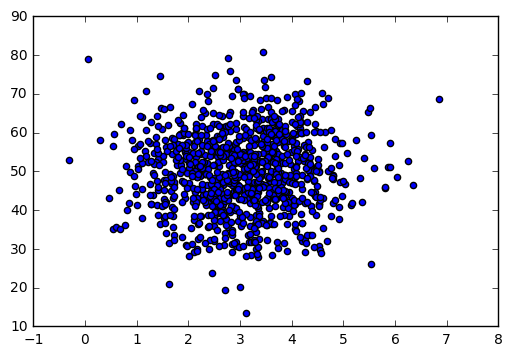

0.196567632916


In [1]:
import numpy as np
from pylab import *
import matplotlib.pyplot as plt


# method to calculate deviation from the mean
def de_mean(x):
    xmean = mean(x)
    return [xi - xmean for xi in x]

# method to calculate covariance
def covariance(x, y):
    n = len(x)
    return dot(de_mean(x), de_mean(y)) / (n-1)

# lets create some random sample data (all normal distributed)
pageSpeeds = np.random.normal(3.0, 1.0, 1000)
purchaseAmount = np.random.normal(50.0, 10.0, 1000)

# plot our data
plt.scatter(pageSpeeds, purchaseAmount)
plt.show()

# calculate covariance using our own method
print(covariance(pageSpeeds, purchaseAmount))
plt.close()


Now we'll make our fabricated purchase amounts an actual function of page speed, making a very real correlation. The negative value indicates an inverse relationship; pages that render in less time result in more money spent:

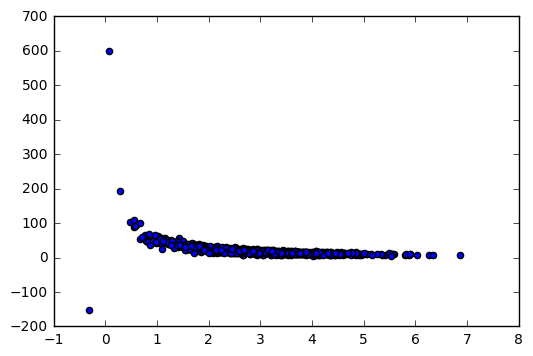

-10.0308540897


In [2]:
purchaseAmount = np.random.normal(50.0, 10.0, 1000) / pageSpeeds

# plot our data
plt.scatter(pageSpeeds, purchaseAmount)
plt.show()

# calculate covariance using our own method
print(covariance(pageSpeeds, purchaseAmount))
plt.close()

## Correlation

But, what does the covariation of data really mean? Covariance is sensitive to the units used in the variables, which makes it difficult to interpret. Correlation normalizes everything by their standard deviations, giving you an easier to understand value that ranges from -1 (for a perfect inverse correlation) to 1 (for a perfect positive correlation):

In [3]:
# method to calculate correlation of two variables
def correlation(x, y):
    stddevx = x.std()
    stddevy = y.std()
    try:
        return covariance(x,y) / stddevx / stddevy
    except ZeroDivisionError:
        return 0

# calculate correlation using our own method
print(correlation(pageSpeeds, purchaseAmount))

-0.428670607566


numpy can do all this for you with numpy.corrcoef. It returns a matrix of the correlation coefficients between every combination of the arrays passed in:

In [4]:
# calculate correlation using numpy
np.corrcoef(pageSpeeds, purchaseAmount)

array([[ 1.        , -0.42824194],
       [-0.42824194,  1.        ]])

(It doesn't match exactly just due to the math precision available on a computer.)

We can force a perfect correlation by fabricating a totally linear relationship (again, it's not exactly -1 just due to precision errors, but it's close enough to tell us there's a really good correlation here):

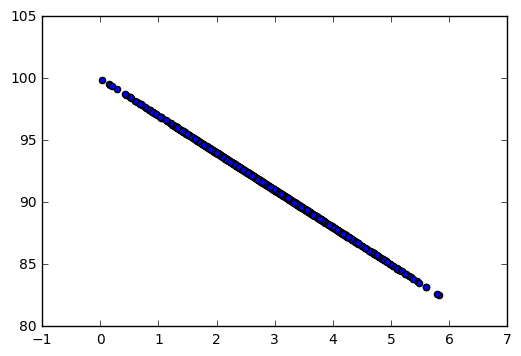

In [19]:
purchaseAmount = 100 - pageSpeeds * 3

# plot new data
plt.scatter(pageSpeeds, purchaseAmount)
plt.show()

# calculate correlation
correlation(pageSpeeds, purchaseAmount)

plt.close()

## Activity

numpy also has a numpy.cov function that can compute Covariance for you. Try using it for the pageSpeeds and purchaseAmounts data above. Interpret its results, and compare it to the results from our own covariance function above.